In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import json

from Modules.Feature_Extraction_temporal_domain import *

In [2]:
import warnings

warnings.filterwarnings("ignore")

## Read Preprocessed Data

In [3]:
def read_csv(filepath):
    f = open(filepath)
    data = json.load(f)
    return data

#ecg = read_csv('Preprocessed_data/ecg/ecg_unfiltered.txt')
ecg_filt = read_csv('Preprocessed_data/ecg/ecg_filtered.txt')

### Crop segments of the signals to remove a few minutes from the start and end
At the very beginning or the end, the device is being attached? removed from the patient hence leading to a high variance in signals

In [4]:
#remove first and last few minutes
for patient in ecg_filt:
    ecg_filt[patient] = ecg_filt[patient][5000:700000]
    #ecg[patient] = ecg[patient][5000:700000]

### Divide signals from patients into chunks of 10 seconds

In [15]:
duration = int(20*62.4725)
segments_ecg = []

for patient in ecg_filt:
    values = ecg_filt[patient]
    for i in range(0,len(values) - duration + 1, duration):
        segments_ecg.append(values[i : (i + duration)])

## Clustering using DBSCAN

In [64]:
features_only = pd.DataFrame()
for i in range(5000):
    try:
        ecg, info = nk.ecg_process(segments_ecg[i], sampling_rate=62.475)
        events  = list(range(1,int(20*62.4725),int(20*62.4725)))
        epochs = nk.epochs_create(ecg, events=events,epochs_start=-0.1, epochs_end=1.9)
        features = nk.ecg_eventrelated(epochs)
        features = features.fillna(0).drop(columns=["Label", "Event_Onset"])
        features_only = features_only.append(features)
    except:
        continue

In [67]:
clustering = DBSCAN(eps=10, min_samples=30).fit(features_only)
DBSCAN_dataset = features_only.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

clusters = DBSCAN_dataset.Cluster.value_counts().to_frame()
clusters

,Cluster
0,2782
-1,1226
1,500
2,398


In [75]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [79]:
dataframe = dataframe.values.tolist()


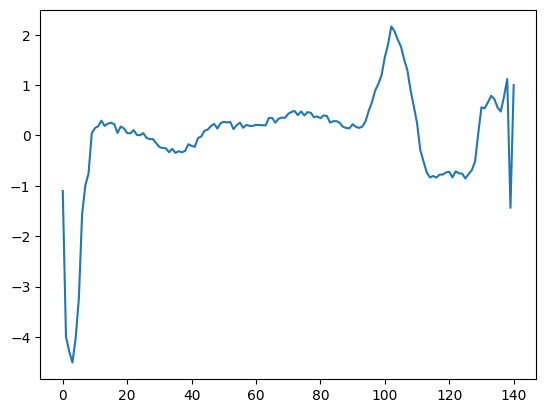

In [81]:
plt.plot(dataframe[1])

In [84]:
epochs = nk.epochs_create(dataframe[0])
features = nk.ecg_eventrelated(epochs)

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> None